In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):  
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
train_data = pd.read_csv('../input/playground-series-s4e9/train.csv')
test_data = pd.read_csv('../input/playground-series-s4e9/test.csv')

# Display the first few rows
train_data.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
24097,24097,Toyota,4Runner Limited,2014,89987,Gasoline,270.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,A/T,Brown,Beige,None reported,Yes,16000
100108,100108,BMW,ALPINA B7 ALPINA B7 xDrive,2021,20623,Gasoline,4.4 Liter Twin Turbo,Automatic,Black,Black,None reported,NaN,132998
163631,163631,Lexus,RX 330 Base,2009,111300,Gasoline,230.0HP 3.3L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Beige,None reported,Yes,7900
81656,81656,Mercedes-Benz,GL-Class GL 550 4MATIC,2014,2978,Gasoline,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,M/T,Blue,Beige,None reported,Yes,76000
121228,121228,Mercedes-Benz,AMG G 63 Base,2018,24500,Gasoline,577.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,103000


In [3]:
train_data.shape

(188533, 13)

In [4]:
# Get a summary of the dataset
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188533.0,94266.000000,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [5]:
train_data=pd.DataFrame(train_data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

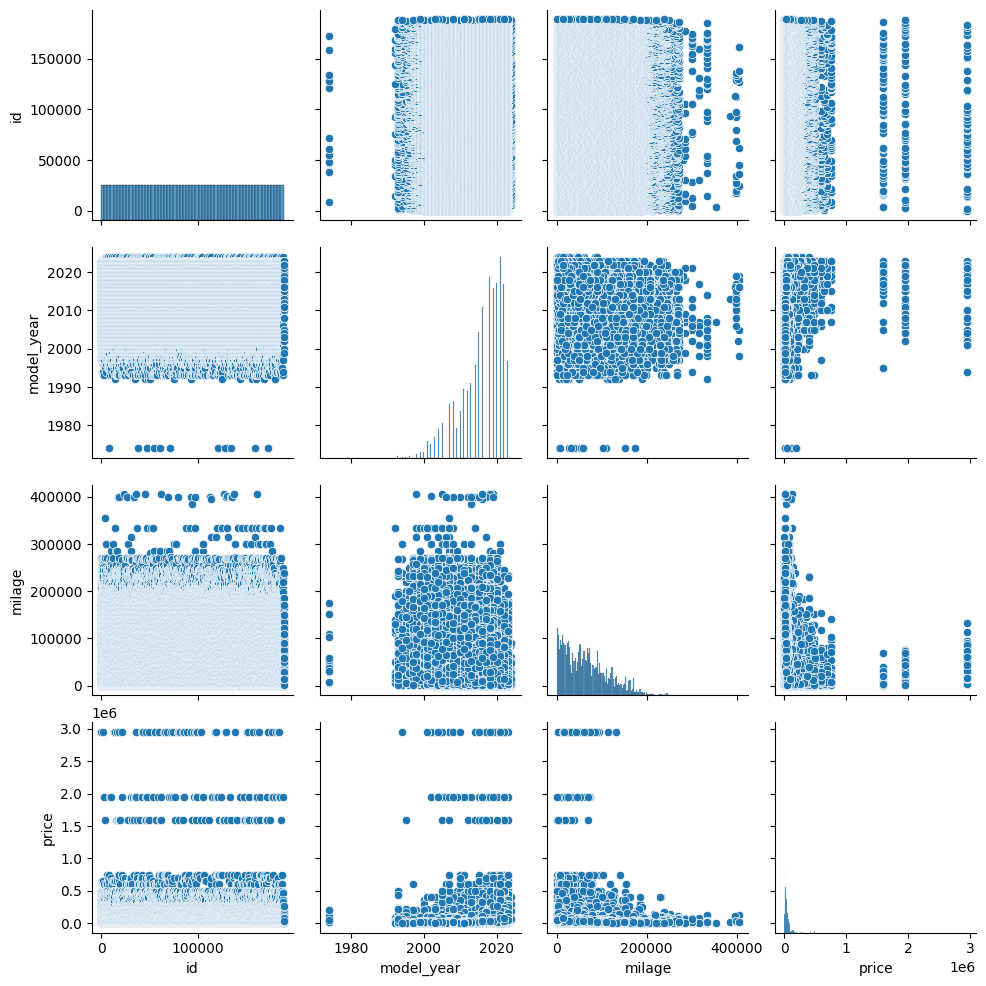

In [6]:
sns.pairplot(train_data)

<Axes: xlabel='price', ylabel='milage'>

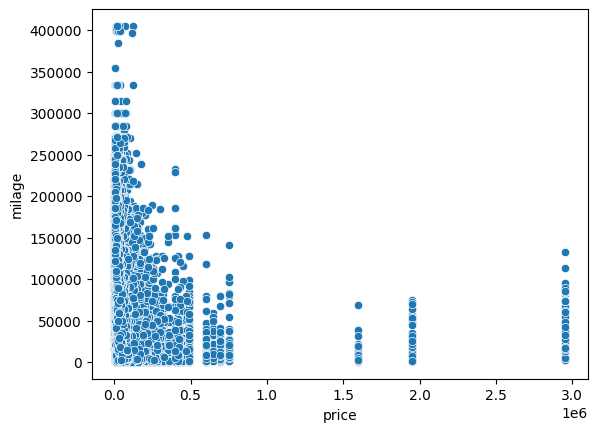

In [7]:
sns.scatterplot(y=train_data['milage'],x=train_data['price'],)

<Axes: xlabel='milage', ylabel='model_year'>

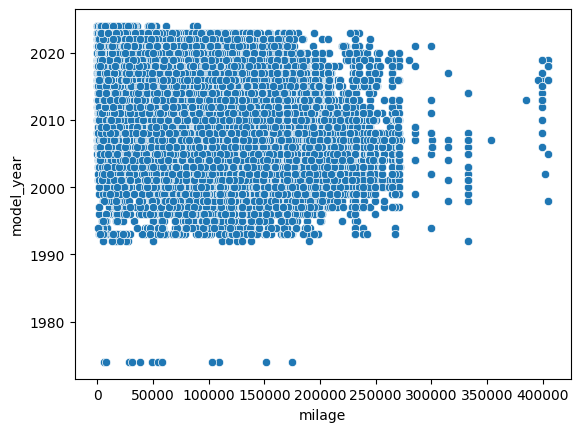

In [8]:
sns.scatterplot(y=train_data['model_year'],x=train_data['milage'],)

In [9]:
#check for missing values
train_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [10]:
# Drop rows with any missing values
train_data_cleaned = train_data.dropna()

# Display the cleaned DataFrame
train_data_cleaned.isnull().sum()


id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

sucesfully dropped missing values , saving the changes

In [11]:
# Drop rows with any missing values and update the original DataFrame
train_data.dropna(inplace=True)

# Display the updated DataFrame
print(train_data)


            id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188527  188527      Chevrolet                Camaro Z28        1999  110000   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_type                              

In [12]:
#taking a better look at the data 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162610 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            162610 non-null  int64 
 1   brand         162610 non-null  object
 2   model         162610 non-null  object
 3   model_year    162610 non-null  int64 
 4   milage        162610 non-null  int64 
 5   fuel_type     162610 non-null  object
 6   engine        162610 non-null  object
 7   transmission  162610 non-null  object
 8   ext_col       162610 non-null  object
 9   int_col       162610 non-null  object
 10  accident      162610 non-null  object
 11  clean_title   162610 non-null  object
 12  price         162610 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 17.4+ MB


In [13]:
#looking at all the brands as there are too many models 
train_data['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Cadillac', 'Land', 'GMC', 'Toyota', 'Hyundai',
       'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'Hummer', 'Alfa',
       'INFINITI', 'Jeep', 'Porsche', 'Honda', 'Lexus', 'Dodge', 'Nissan',
       'Jaguar', 'Kia', 'Mitsubishi', 'Rolls-Royce', 'Maserati',
       'Pontiac', 'Saturn', 'Bentley', 'Tesla', 'Mazda', 'Subaru',
       'Ferrari', 'Aston', 'Acura', 'Lamborghini', 'Chrysler', 'RAM',
       'McLaren', 'Lucid', 'Lotus', 'Scion', 'Plymouth', 'Suzuki', 'FIAT',
       'Saab', 'Bugatti', 'Mercury', 'Karma', 'Maybach', 'Polestar',
       'smart'], dtype=object)

In [14]:
#looking at mean price of all the car, models as there were few very expensive cars for  btoh less and high milage 
train_data_cleaned.groupby('brand')['price'].mean().sort_values(ascending=False)

brand
Bugatti          176080.000000
Lamborghini      141608.376000
Rolls-Royce      134177.188100
Bentley          125603.946640
McLaren          116722.409574
Ferrari          109615.918819
Aston            105740.069444
Rivian            68113.070588
Lucid             66349.941176
Porsche           65813.648532
Maserati          56797.172249
Maybach           53566.333333
Genesis           52206.617433
Tesla             50809.854227
Land              50485.347334
Alfa              48740.194882
Mercedes-Benz     48433.762492
RAM               48390.911531
Jaguar            45703.289474
Cadillac          44454.666051
BMW               41717.418408
Chevrolet         40316.258273
Ford              39226.667276
GMC               37870.854209
Audi              36349.571836
Karma             36247.500000
Lexus             32678.296510
INFINITI          32647.800838
Kia               32409.137432
Dodge             32222.635996
Polestar          31990.000000
Jeep              31490.050281
Vo

In [15]:
#lets analyse the effect of price on the type  of vehical 
fueltype=train_data_cleaned.groupby('fuel_type')['price'].mean().sort_values(ascending=False)
print(fueltype)

fuel_type
Hybrid            54554.821379
Diesel            47627.093100
Plug-In Hybrid    43773.581818
Gasoline          40736.904035
–                 36151.190728
E85 Flex Fuel     25490.885005
not supported     20692.733333
Name: price, dtype: float64


<Axes: xlabel='milage', ylabel='price'>

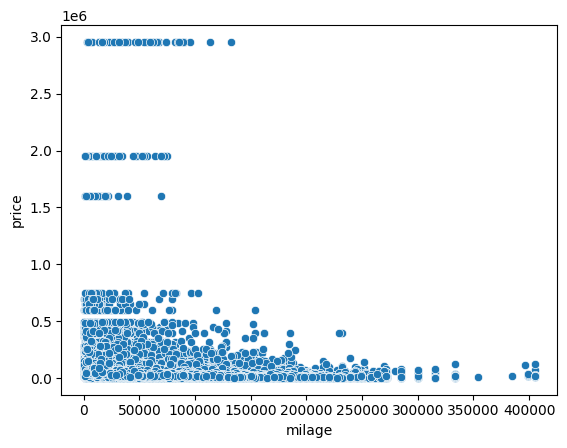

In [16]:
sns.scatterplot(x=train_data_cleaned['milage'],y=train_data_cleaned['price'])

In [17]:
# Group by 'brand' and calculate various statistics for 'price'
brand_stats = train_data_cleaned.groupby('brand')['price'].agg(['mean', 'count', 'min', 'max', 'std'])

# Sort by the mean price in descending order
brand_stats_sorted = brand_stats.sort_values(by='mean', ascending=False)

# Display the detailed statistics
print(brand_stats_sorted)


                        mean  count    min      max            std
brand                                                             
Bugatti        176080.000000      5  75000   259500   80559.338379
Lamborghini    141608.376000    500   4500  1950995  187228.414049
Rolls-Royce    134177.188100    521   4995  1950995  180182.505432
Bentley        125603.946640   1012   2300  2954083  213646.228648
McLaren        116722.409574    188   7950   599000   96885.893423
Ferrari        109615.918819    271   3990   695000  105465.169772
Aston          105740.069444    216   3850  2954083  218239.991785
Rivian          68113.070588     85   5900   188900   38884.668688
Lucid           66349.941176     17   9499   279950   66401.366579
Porsche         65813.648532   9025   2000  1950995  110887.756191
Maserati        56797.172249    836   2300   749950   62083.405772
Maybach         53566.333333      3  15500    90200   37370.602087
Genesis         52206.617433    826   2900  1599000   76061.58

In [18]:
train_data_cleaned.groupby('brand')['milage'].mean().sort_values(ascending=False)

brand
Hummer           132893.025243
Suzuki           110572.833333
Mitsubishi       109833.740602
Plymouth         105008.285714
Honda            104744.735777
Saturn           102154.680556
Pontiac          102034.901887
Scion            101488.517544
Chrysler         100874.069264
Mercury           96658.381818
Toyota            96348.711651
MINI              94641.290821
Dodge             93973.509606
Nissan            92044.027149
Acura             90992.451669
Subaru            88268.887769
Maybach           87390.000000
Lexus             86796.254264
Volkswagen        83285.591418
Hyundai           82638.621354
Lincoln           82001.702786
Mazda             81591.359799
Buick             79025.461111
FIAT              78982.864865
Jeep              76420.118762
GMC               76285.731987
INFINITI          73918.197228
Volvo             73819.035061
Ford              73646.281806
Saab              72565.863636
Cadillac          72534.101155
Chevrolet         71310.844496
Ki

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='milage'>

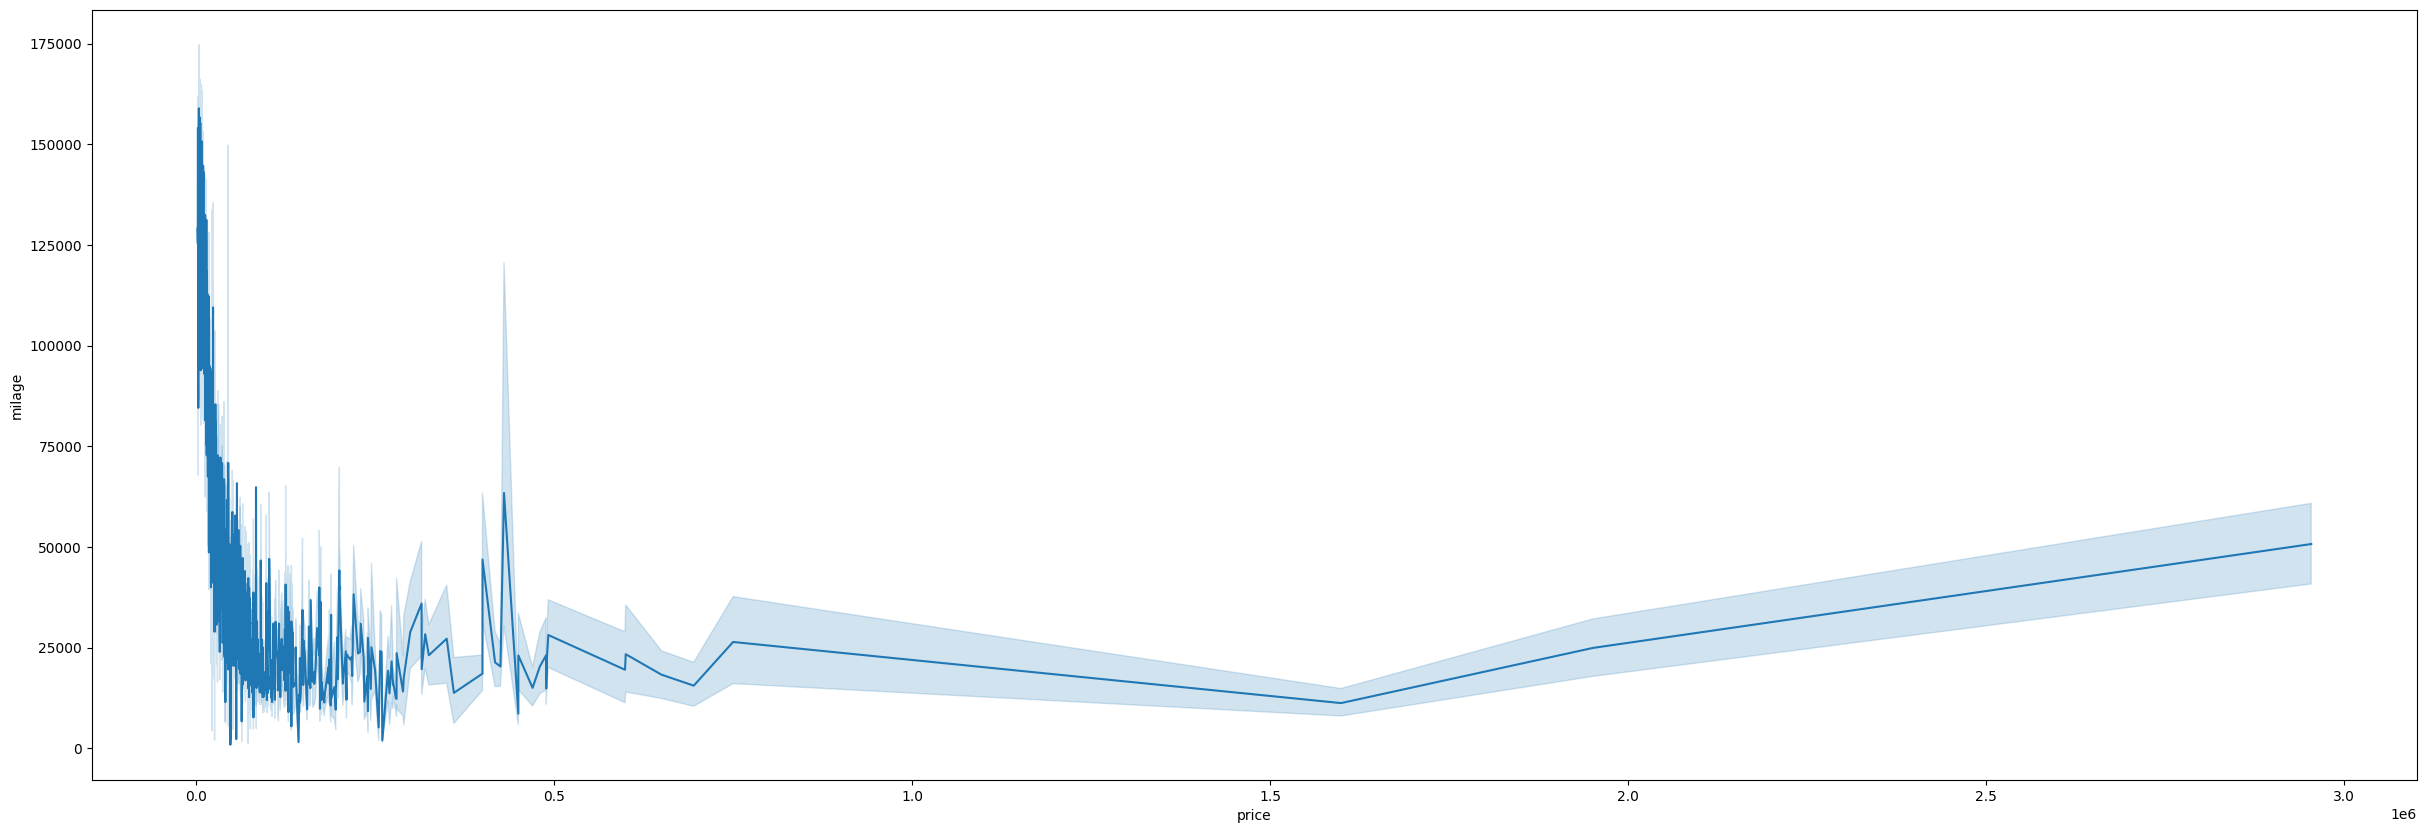

In [19]:
# Set the figure size
plt.figure(figsize=(30, 10)) 
sns.lineplot(x=train_data_cleaned['price'],y=train_data_cleaned['milage'])

In [20]:
#looks like the cars towards the left of the curve are luxurious while the ones to right more basic as the ones to the right are having a higher milage and lower price while the ones to  th left of the are showing the exact opposit behaviour 
#FRom multiple plots its evident that both milage and price are inversly propotional even with the outlirs of luxurious segment 

<Axes: >

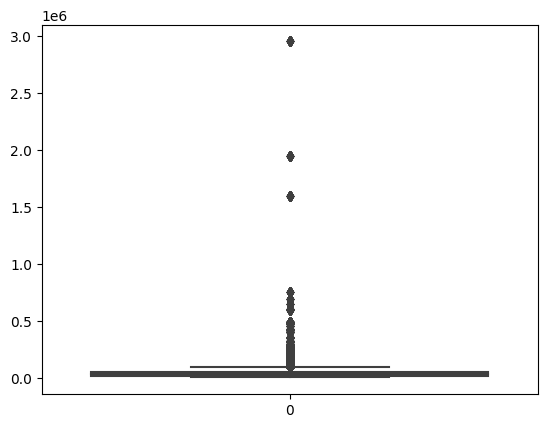

In [21]:
sns.boxplot(train_data_cleaned['price'])

In [22]:
#we canobserve that there are outlier that on the higher side of the y axis, meaning again the mixture ofluxurious and noraml segmentcarsdoes impact the final price  

In [23]:
## deriving relations btw features or getting insight is  very difficult as the amount of indivisual records over load the visuals presenton the screen for  bar plot or histogram  

In [24]:
train_data_cleaned.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
123035,123035,Toyota,MX-5 Miata Base,1997,65750,Gasoline,142.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Green,Beige,None reported,Yes,11500
99520,99520,Toyota,4Runner TRD Pro,2018,87500,Gasoline,270.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Gray,At least 1 accident or damage reported,Yes,34000
76213,76213,Ford,Transit Connect XLT,2011,106700,Gasoline,136.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,6000
171307,171307,Chevrolet,Corvette Z06,2018,19987,Gasoline,505.0HP 7.0L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Orange,Beige,At least 1 accident or damage reported,Yes,117000
78464,78464,Chevrolet,Suburban Premier,2019,53433,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,39500


Until now it is evident that , the price of the car is inversly propotional to the milage for both entry level cars and luxurious cars  

The model of the car also has a direct impact on the price as Buggati was having the highest mean price and  the nissans and toyota is low 

/tmp/ipykernel_17/3489615692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train_data_cleaned['model_year'],hist=False)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

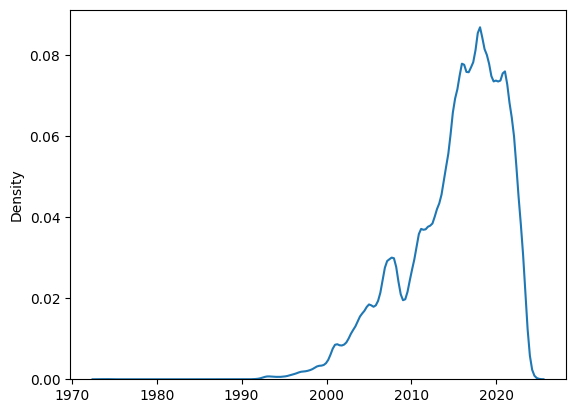

In [25]:
sns.distplot(x=train_data_cleaned['model_year'],hist=False)

In [26]:
train_data_cleaned['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       '–', 'not supported'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


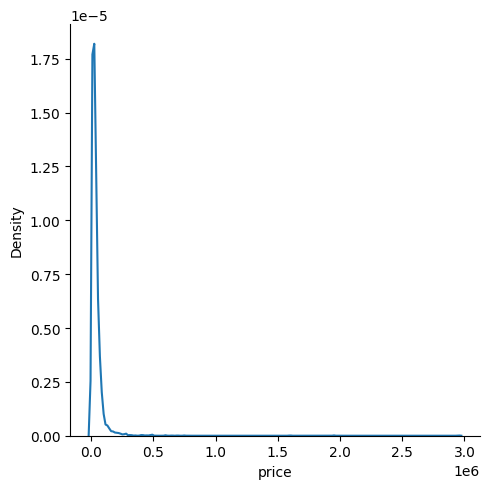

In [27]:
import seaborn as sns

# Plotting the KDE for 'price' of gasoline cars without the histogram
sns.displot(train_data_cleaned[train_data_cleaned['fuel_type'] == 'Gasoline']['price'], kind='kde')


Noting substantial until now.... apart from the previous obervations 

<Axes: xlabel='accident', ylabel='price'>

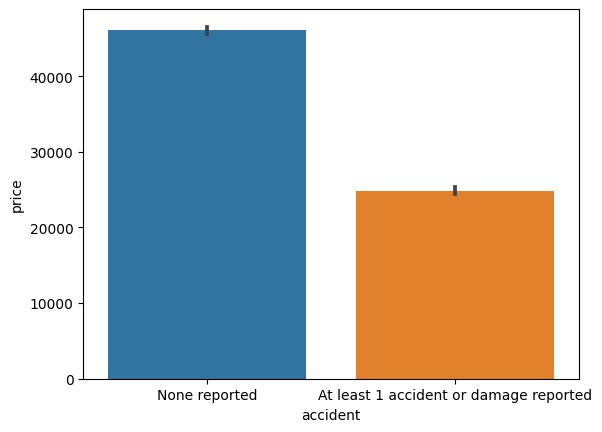

In [28]:
sns.barplot(x=train_data_cleaned['accident'],y=train_data_cleaned['price'])

Until now it is evident that , the price of the car is inversly propotional to the milage for both entry level cars and luxurious cars

The model of the car also has a direct impact on the price as Buggati was having the highest mean price and the nissans and toyota is low

It can also be noted that there are a direct correletaion btw the price and accidents on the car

<Axes: xlabel='model_year', ylabel='price'>

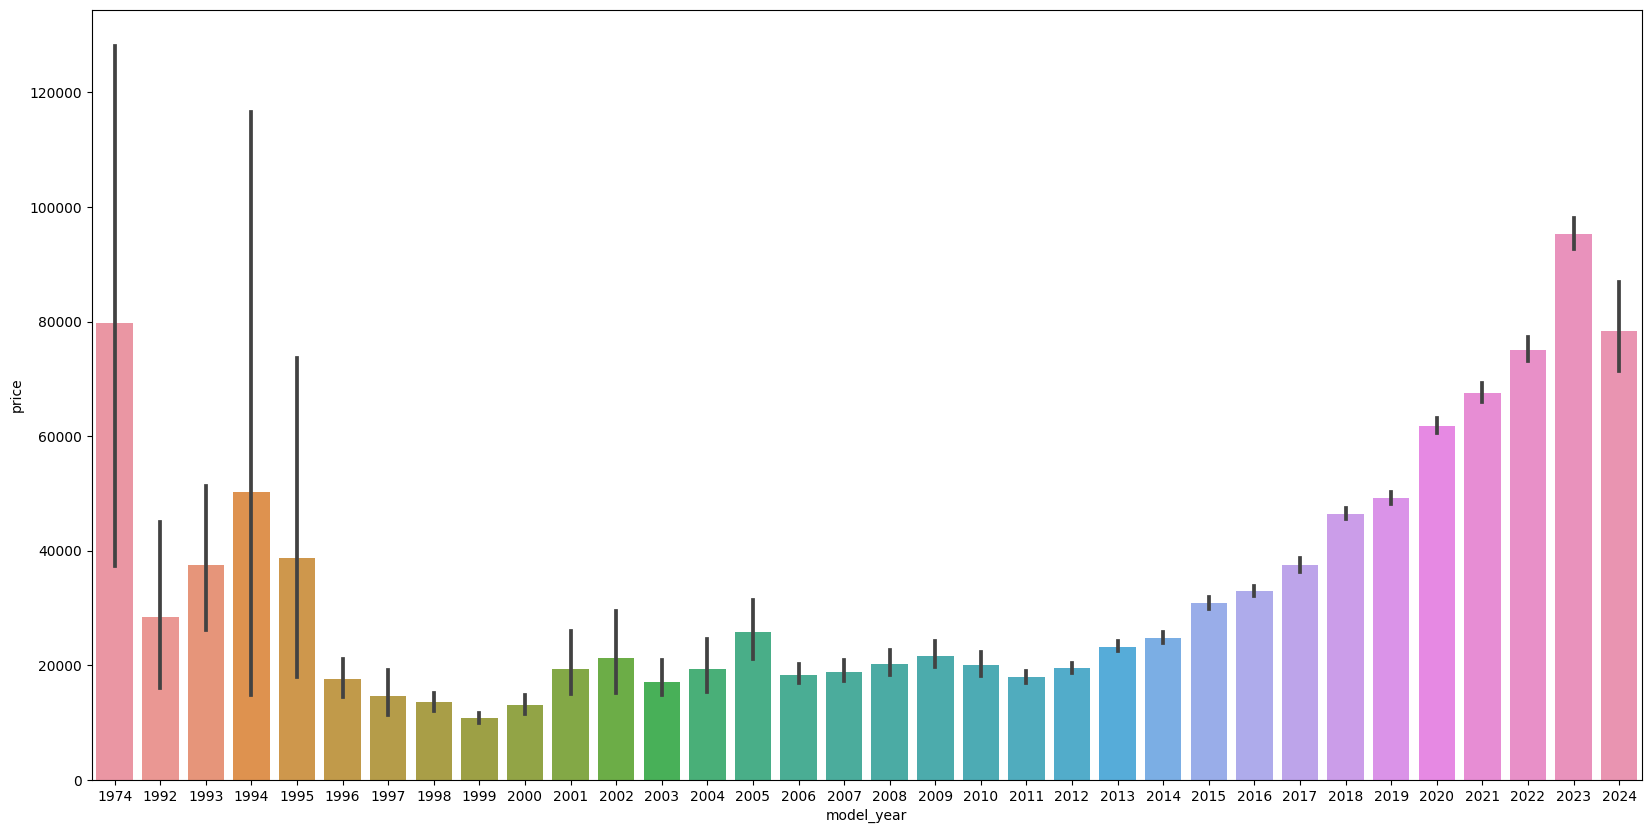

In [29]:
#  Comparing pricewith year of production
plt.figure(figsize=(20, 10))  # Width=12, Height=6
sns.barplot(x=train_data_cleaned['model_year'],y=train_data_cleaned['price'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='brand', ylabel='Count'>

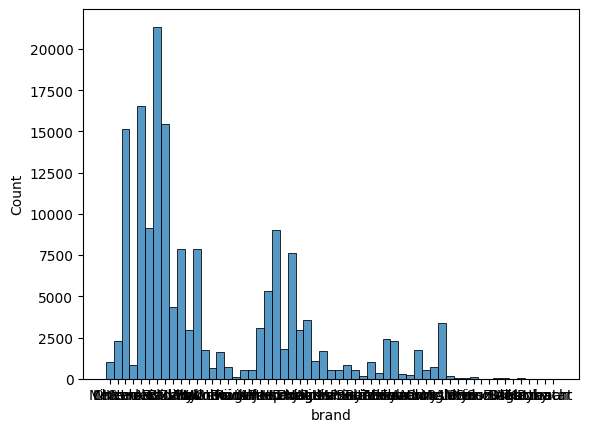

In [30]:

sns.histplot(train_data['brand'])

In [31]:
#sns.heatmap(train_data_cleaned)
#we need to convert data into float64 from object type 

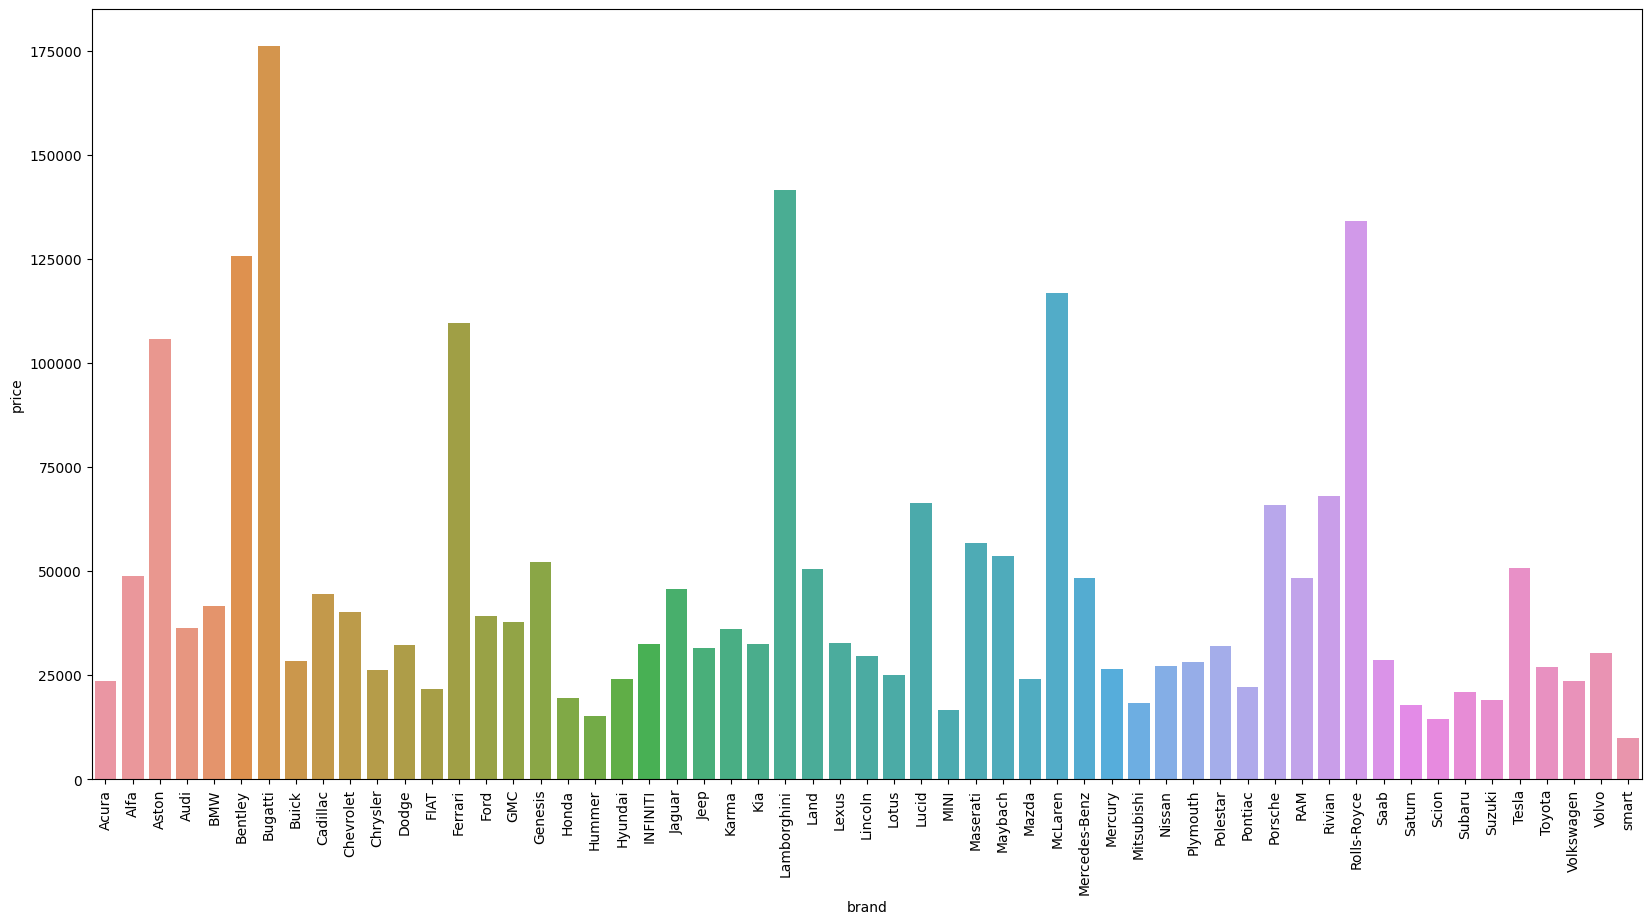

In [32]:
plt.figure(figsize=(20, 10))  # Width=12, Height=6

# Group by 'brand' and calculate the mean of 'price'
grouped_data = train_data_cleaned.groupby('brand')['price'].mean().reset_index()

# Create the barplot using the grouped data
sns.barplot(x=grouped_data['brand'], y=grouped_data['price'])

# Optional: Rotate the x-axis labels if there are many brands
plt.xticks(rotation=90)


# Show the plot
plt.show()

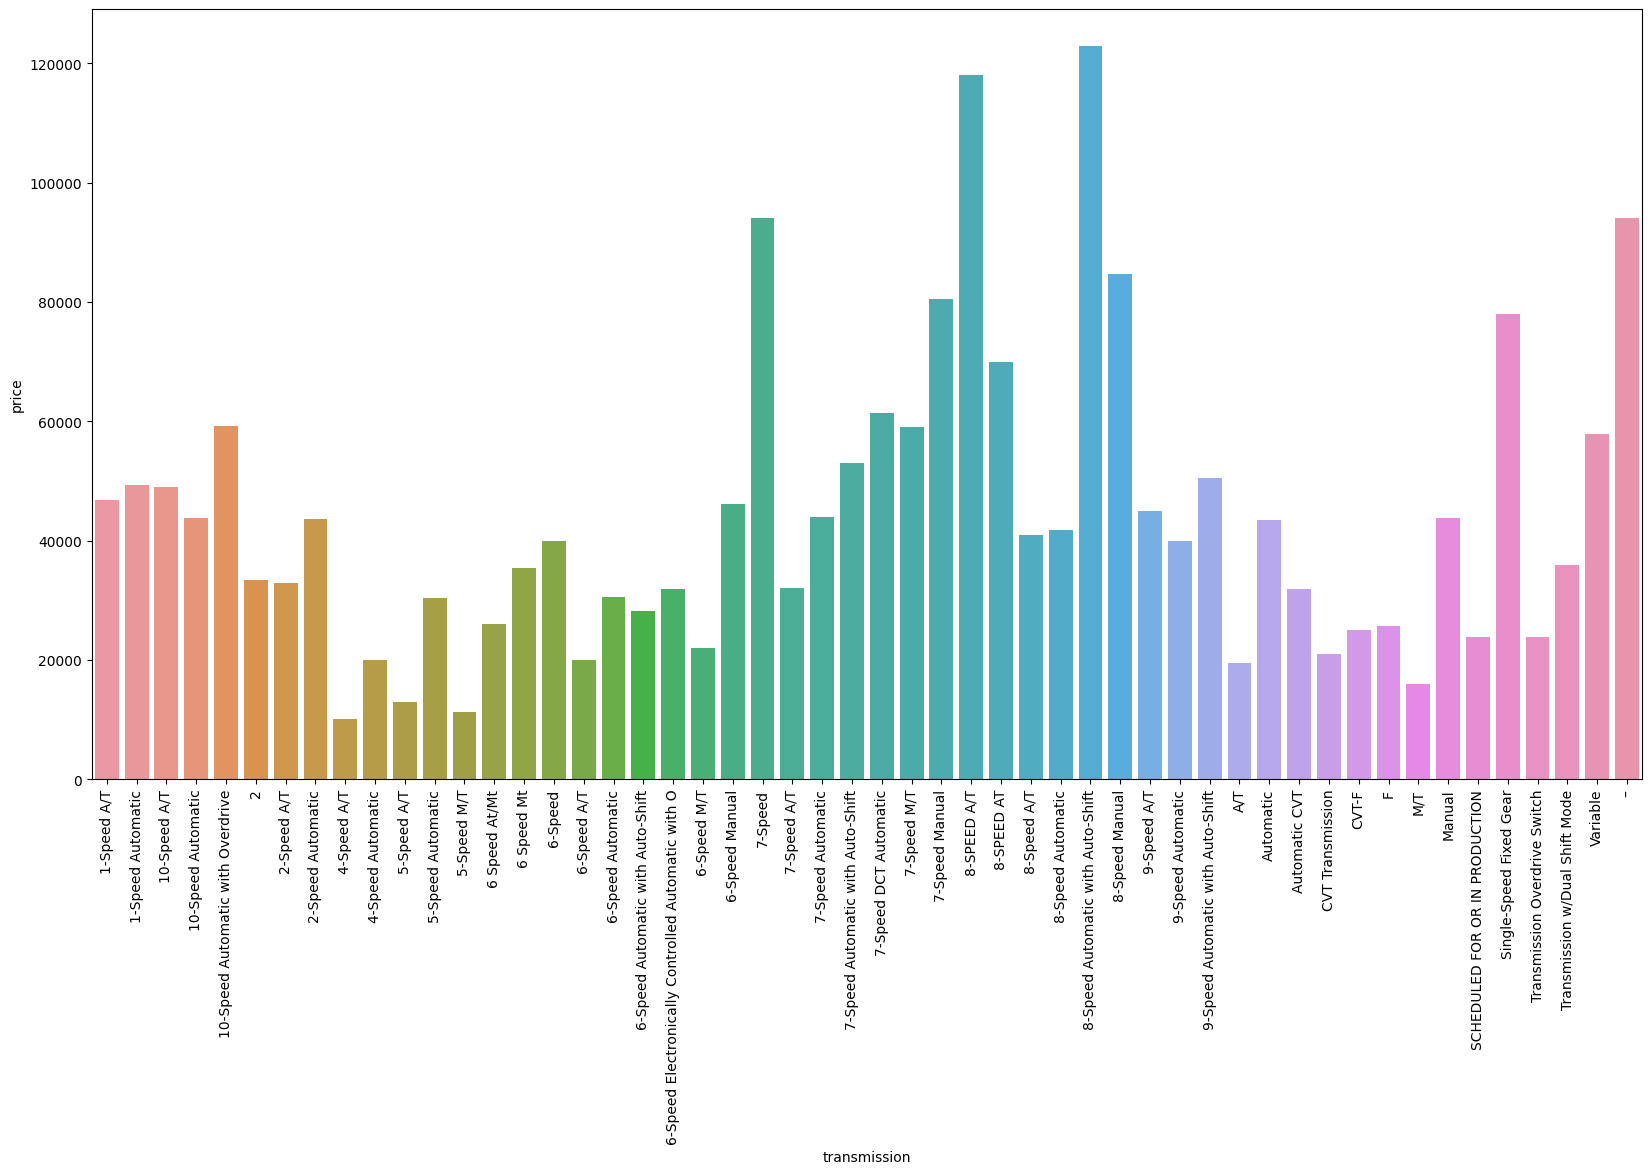

In [33]:
# Set figure size before the plot
plt.figure(figsize=(20, 10))

# Group by 'transmission' and calculate the median 'price'
grouped_data = train_data_cleaned.groupby('transmission')['price'].median().reset_index()

# Create the barplot using the grouped data
sns.barplot(x=grouped_data['transmission'], y=grouped_data['price'])

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [34]:
train_data_cleaned.sample()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
97292,97292,Audi,A5 2.0T Prestige,2015,92000,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,8-Speed A/T,White,Brown,None reported,Yes,23000


In [35]:
# Group by 'brand' and calculate the mean, median, and count of 'price'
grouped_data = train_data_cleaned.groupby('brand')['price'].agg(['mean', 'median', 'count'])

# Sort by 'mean' price in descending order
sorted_data = grouped_data.sort_values(by='mean', ascending=False)

# Display the sorted data
print(sorted_data)

                        mean    median  count
brand                                        
Bugatti        176080.000000  220000.0      5
Lamborghini    141608.376000   87325.0    500
Rolls-Royce    134177.188100   76740.0    521
Bentley        125603.946640   72999.5   1012
McLaren        116722.409574   82725.0    188
Ferrari        109615.918819   76000.0    271
Aston          105740.069444   64997.5    216
Rivian          68113.070588   67500.0     85
Lucid           66349.941176   41995.0     17
Porsche         65813.648532   42242.0   9025
Maserati        56797.172249   41594.0    836
Maybach         53566.333333   54999.0      3
Genesis         52206.617433   38500.0    826
Tesla           50809.854227   44850.0    343
Land            50485.347334   35999.0   7857
Alfa            48740.194882   38322.0    508
Mercedes-Benz   48433.762492   33999.0  16530
RAM             48390.911531   39000.0   3391
Jaguar          45703.289474   35000.0   1064
Cadillac        44454.666051   295

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ext_col', ylabel='price'>

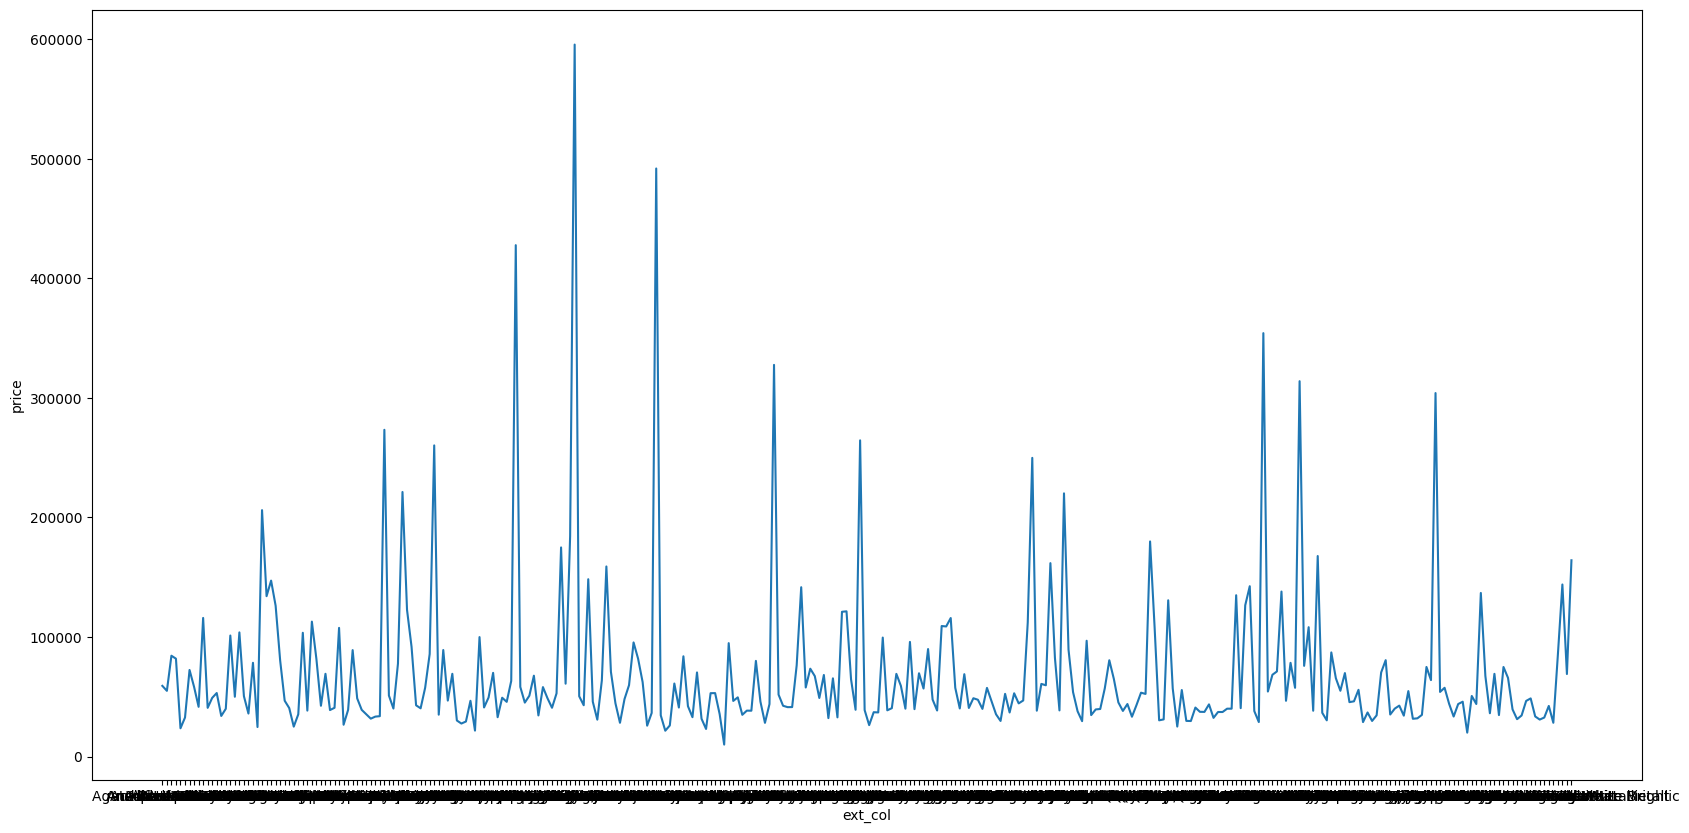

In [36]:
plt.figure(figsize=(20, 10))

# Group by 'brand' and calculate the mean, median, and count of 'price'
grouped_data = train_data_cleaned.groupby('ext_col')['price'].mean().reset_index()

# Display the sorted data
sns.lineplot(x=grouped_data['ext_col'],y=grouped_data['price'])


In [37]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(train_data_cleaned)
#prof.to_notebook_iframe()

In [38]:
train_data_cleaned[train_data_cleaned['milage']==1000]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
15738,15738,Chevrolet,Tahoe LTZ,2015,1000,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,36995
29460,29460,Chevrolet,Tahoe LTZ,2015,1000,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Blue,Beige,None reported,Yes,28000
32424,32424,Maserati,Ghibli S Q4 GranSport,2018,1000,Gasoline,424.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,49500
37826,37826,Maserati,Ghibli S Q4 GranSport,2020,1000,Gasoline,424.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,40000
69935,69935,Maserati,Ghibli S Q4,2017,1000,Gasoline,404.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Red,None reported,Yes,31000
174296,174296,Maserati,Ghibli S Q4,2018,1000,Gasoline,404.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Red,None reported,Yes,36000


/tmp/ipykernel_17/429478601.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data_cleaned['price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

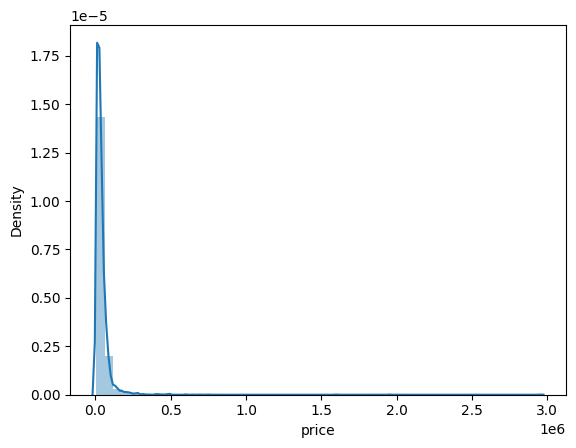

In [39]:
# price  columb/feature seems to be  skewed so we will  have to fix that before doing hypothesistesting 
# lets plot it  first 
sns.distplot(train_data_cleaned['price'])

Lets try to fix the sckewness using :

1.Log Transformation

2.Box-Cox Transformation


In [40]:
#it looks better but lets try with 

### final price graph with normal distibution 



## Hypothesis Testing

ypothesis 1: Car Accidents Affect Transformed Price
Null Hypothesis (H₀): There is no significant difference in the average transformed price of cars with and without accidents.
Alternative Hypothesis (H₁): Cars with reported accidents have a significantly lower average transformed price than those without accidents.


Hypothesis 2: Fuel Type Influences Transformed Car Price
Null Hypothesis (H₀): The average transformed price of cars is the same across different fuel types.
Alternative Hypothesis (H₁): The average transformed price of cars significantly differs across fuel types.


Hypothesis 3: Car Mileage Affects Transformed Price
Null Hypothesis (H₀): There is no significant correlation between car mileage and transformed price.
Alternative Hypothesis (H₁): There is a significant correlation between car mileage and transformed price.


**Testing these hypotheses on the Box-Cox transformed price data:
1. Test for Car Accidents Affecting Transformed Price (T-test)

**we shouldcross check this as our p value truns to to be zero**

**lets check the no of cars with and without a accient**

print(f"Number of cars with accidents: {accident_cars.count()}")
print(f"Number of cars without accidents: {no_accident_cars.count()}")


In [41]:
#still  p value is zero 

#### looks like the P-Value zero only moving on 2 second hypothesis 

2. Test for Fuel Type Affecting Transformed Price (ANOVA)

**3. Test for Mileage Affecting Transformed Price (Correlation Test)**

In [42]:
#conclusion 


1. Hypothesis: Car Accidents Affect Transformed Price
Null Hypothesis (H₀): There is no significant difference in the average transformed price of cars with and without accidents.
Alternative Hypothesis (H₁): Cars with reported accidents have a significantly lower average transformed price than those without accidents.

Results:

T-Test:

T-statistic: 118.29
P-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant difference in transformed car prices based on accident history. Cars with reported accidents have a significantly lower average transformed price compared to those without accidents.
Mann-Whitney U Test (Alternative):

U-statistic: 3,430,844,994.0
P-value: 0.0
Conclusion: Consistent with the T-test, reject the null hypothesis. There is a significant difference in transformed car prices based on accident history.
2. Hypothesis: Fuel Type Influences Transformed Car Price
Null Hypothesis (H₀): The average transformed price of cars is the same across different fuel types.
Alternative Hypothesis (H₁): The average transformed price of cars significantly differs across fuel types.

Results:

ANOVA Test:
F-statistic: 398.43
P-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant difference in transformed car prices across different fuel types.
3. Hypothesis: Car Mileage Affects Transformed Price
Null Hypothesis (H₀): There is no significant correlation between car mileage and transformed price.
Alternative Hypothesis (H₁): There is a significant correlation between car mileage and transformed price.

Results:

Pearson Correlation Test:
Correlation Coefficient: -0.699
P-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant negative correlation between mileage and transformed price. As mileage increases, the transformed price tends to decrease.

**Summary**

Accident History: Significant impact on transformed car prices.

Fuel Type: Significant effect on transformed car prices.

Mileage: Significant negative correlation with transformed car prices.

**These findings indicate that accident history and fuel type both play significant roles in determining the price of cars, and higher mileage is associated with lower prices.**

> **Standardization**

In [43]:
#sns.histplot(train_data_cleaned['price_boxcox'], kde=True)

In [44]:
#sns.kdeplot(train_data_cleaned['price_boxcox'])

WE normalised the data to get a better understanding of the given data and never use the target feature after normalizing or standardising it 

In [45]:
"""
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Select numerical features
numeric_features = ['milage', 'model_year']

# Function to evaluate features
def evaluate_features(data, features):
    results = {}
    for feature in features:
        skewness = data[feature].skew()
        results[feature] = {
            'Skewness': skewness,
            'Transformation': None,
            'Action': None
        }

        # Determine transformation based on skewness
        if abs(skewness) < 0.5:
            results[feature]['Action'] = 'None'  # No transformation needed
        elif 0.5 <= abs(skewness) < 1:
            results[feature]['Action'] = 'Standardize'  # Use standardization
        else:
            results[feature]['Action'] = 'Transform then Normalize'  # Use log transformation then normalize

        # Print skewness and recommendation
        print(f"Feature: {feature}, Skewness: {skewness:.2f}, Action: {results[feature]['Action']}")
        
        # Plot distribution
        plt.figure(figsize=(8, 4))
        sns.histplot(data[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.axvline(0, color='red', linestyle='--')  # Add a vertical line at mean=0 for standardization
        plt.show()

    return results

# Evaluate features
results = evaluate_features(train_data, numeric_features)

# Based on results, we can standardize or normalize as needed
"""

'\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n\n\n# Select numerical features\nnumeric_features = [\'milage\', \'model_year\']\n\n# Function to evaluate features\ndef evaluate_features(data, features):\n    results = {}\n    for feature in features:\n        skewness = data[feature].skew()\n        results[feature] = {\n            \'Skewness\': skewness,\n            \'Transformation\': None,\n            \'Action\': None\n        }\n\n        # Determine transformation based on skewness\n        if abs(skewness) < 0.5:\n            results[feature][\'Action\'] = \'None\'  # No transformation needed\n        elif 0.5 <= abs(skewness) < 1:\n            results[feature][\'Action\'] = \'Standardize\'  # Use standardization\n        else:\n            results[feature][\'Action\'] = \'Transform then Normalize\'  # Use log transformation then normalize\n\n        # Print skewness and recommendation\n        print(f"Feature: {feature}, Skewness: {skewness:.2f}, Action: {

# lets standarise milage and model year 

In [46]:
"""
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# train_data = pd.read_csv('your_data.csv')  # Replace with your actual data loading method

# Select numerical features excluding price as it's the target variable
numeric_features = ['milage', 'model_year']

# Standardization
scaler_standard = StandardScaler()

# Standardize mileage and model year
train_data[numeric_features] = scaler_standard.fit_transform(train_data[numeric_features])

# Display the transformed dataset (excluding the price)
print(train_data.head())

# Plotting to visualize transformations
plt.figure(figsize=(10, 5))

# Mileage
plt.subplot(1, 2, 1)
sns.histplot(train_data['milage'], bins=30, kde=True)
plt.title('Standardized Mileage Distribution')

# Model Year
plt.subplot(1, 2, 2)
sns.histplot(train_data['model_year'], bins=30, kde=True)
plt.title('Standardized Model Year Distribution')

plt.tight_layout()
plt.show()
"""

"\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Load your data\n# train_data = pd.read_csv('your_data.csv')  # Replace with your actual data loading method\n\n# Select numerical features excluding price as it's the target variable\nnumeric_features = ['milage', 'model_year']\n\n# Standardization\nscaler_standard = StandardScaler()\n\n# Standardize mileage and model year\ntrain_data[numeric_features] = scaler_standard.fit_transform(train_data[numeric_features])\n\n# Display the transformed dataset (excluding the price)\nprint(train_data.head())\n\n# Plotting to visualize transformations\nplt.figure(figsize=(10, 5))\n\n# Mileage\nplt.subplot(1, 2, 1)\nsns.histplot(train_data['milage'], bins=30, kde=True)\nplt.title('Standardized Mileage Distribution')\n\n# Model Year\nplt.subplot(1, 2, 2)\nsns.histplot(train_data['model_year'], bins=30, kde=True)\nplt.title('Standardized Model Year Distribution')\n\nplt

 **Coverting categorical data to numerical data** 

In [47]:
train_data_cleaned.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [48]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


#### one hot encoding to be performed on (engine, transmission, ext_col, int_col, clean_title  and model) and ordinal transfrom on , fuel_type brand and accident 

In [49]:
# 1. Create a manual ordering for 'brand' and 'fuel_type' based on mean prices
brand_order = ['Bugatti', 'Lamborghini', 'Rolls-Royce', 'Bentley', 'McLaren', 'Ferrari', 
               'Aston', 'Rivian', 'Lucid', 'Porsche', 'Maserati', 'Maybach', 'Genesis', 
               'Tesla', 'Land', 'Alfa', 'Mercedes-Benz', 'RAM', 'Jaguar', 'Cadillac', 
               'BMW', 'Chevrolet', 'Ford', 'GMC', 'Audi', 'Karma', 'Lexus', 'INFINITI', 
               'Kia', 'Dodge', 'Polestar', 'Jeep', 'Volvo', 'Lincoln', 'Saab', 'Buick', 
               'Plymouth', 'Nissan', 'Toyota', 'Mercury', 'Chrysler', 'Lotus', 'Mazda', 
               'Hyundai', 'Acura', 'Volkswagen', 'Pontiac', 'FIAT', 'Subaru', 'Honda', 
               'Suzuki', 'Mitsubishi', 'Saturn', 'MINI', 'Hummer', 'Scion', 'smart']

fuel_type_order = ['Hybrid', 'Diesel', 'Plug-In Hybrid', 'Gasoline', '–', 'E85 Flex Fuel', 'not supported']


In [50]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# 2. Define the ColumnTransformer with OrdinalEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('brand', OrdinalEncoder(categories=[brand_order]), ['brand']),  # Apply custom order for brand
        ('fuel_type', OrdinalEncoder(categories=[fuel_type_order]), ['fuel_type']),
        ('num', 'passthrough', ['milage', 'model_year'])  # Pass through numerical columns
    ])

## one hot encoding the test data 

but first fill missing values 

In [51]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Columns with missing values in the test data
missing_cols = ['fuel_type', 'accident', 'clean_title']

# Create a SimpleImputer for filling missing values with the most frequent value (mode) for categorical columns
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer on the columns with missing values
test_data[missing_cols] = imputer.fit_transform(test_data[missing_cols])

# Check if missing values are handled
print(test_data.isnull().sum())


id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


In [52]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# First, let's handle missing values
missing_cols = ['fuel_type', 'accident', 'clean_title']
imputer = SimpleImputer(strategy='most_frequent')
test_data[missing_cols] = imputer.fit_transform(test_data[missing_cols])

# Now, let's create our preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Use OrdinalEncoder for 'brand', 'fuel_type', and 'accident'
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
         ['brand', 'fuel_type', 'accident']),
        
        # Use OneHotEncoder for categorical columns
        ('onehot', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), 
         ['engine', 'transmission', 'ext_col', 'int_col', 'clean_title', 'model']),
        
        # Pass through numerical columns
        ('num', 'passthrough', ['milage', 'model_year'])
    ])

# Fit and transform the data
test_data_encoded = preprocessor.fit_transform(test_data)

# Get feature names
ordinal_cols = ['brand', 'fuel_type', 'accident']
onehot_cols = preprocessor.named_transformers_['onehot'].get_feature_names_out(['engine', 'transmission', 'ext_col', 'int_col', 'clean_title', 'model'])
num_cols = ['milage', 'model_year']

# Combine all feature names
feature_names = ordinal_cols + list(onehot_cols) + num_cols

# Create DataFrame with encoded data
test_data_encoded_df = pd.DataFrame(test_data_encoded, columns=feature_names)

# Display the first few rows of the encoded data
print(test_data_encoded_df.head())

# Print shape of the encoded data
print(f"Shape of encoded data: {test_data_encoded_df.shape}")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   brand  fuel_type  accident  engine_1.3L I3 12V GDI DOHC Turbo  \
0   26.0        2.0       1.0                                0.0   
1   26.0        3.0       1.0                                0.0   
2   14.0        2.0       1.0                                0.0   
3    3.0        2.0       1.0                                0.0   
4    3.0        2.0       1.0                                0.0   

   engine_1.3L I3 12V MPFI DOHC Turbo  engine_1.4L I4 16V GDI DOHC Turbo  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                0.0   
4                                 0.0                                0.0   

   engine_1.5 Liter Turbo  engine_1.5L I3 12V GDI DOHC Turbo  \
0                     0.0                                0.0   
1     

In [53]:
test_data.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
85238,273771,Chevrolet,Camaro LT1,2006,75151,Gasoline,300.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Gray,Beige,None reported,Yes
122911,311444,Hummer,H2 Base,2003,104000,Gasoline,325.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes
107384,295917,Chevrolet,Camaro 1SS,2015,8660,Gasoline,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,Yellow,Black,None reported,Yes
99260,287793,Toyota,Tundra Platinum,2018,67865,Gasoline,381.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes
70190,258723,Ford,F-250 Lariat,2023,9281,Diesel,440.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,White,Black,None reported,Yes


In [54]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Assume train_data_cleaned and test_data are already loaded

# Features and target from the training data
X_train = train_data_cleaned.drop('price', axis=1)
y_train = train_data_cleaned['price']

# Check for missing columns in test data and handle missing values
missing_cols = ['fuel_type', 'accident', 'clean_title']  # Columns to be imputed (adjust according to your dataset)
missing_cols_present = [col for col in missing_cols if col in test_data.columns]
imputer = SimpleImputer(strategy='most_frequent')

if missing_cols_present:
    test_data[missing_cols_present] = imputer.fit_transform(test_data[missing_cols_present])

# Preprocessing pipeline creation
def create_preprocessor():
    # List of numeric and categorical features
    numeric_features = ['milage', 'model_year']  # Modify according to your dataset
    categorical_features = ['brand', 'fuel_type', 'accident']  # Add or modify features as per your dataset

    # Numeric processing (standard scaling)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    # Categorical processing (one-hot encoding)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

    # Combine the preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    return preprocessor

# Create the preprocessor pipeline
preprocessor = create_preprocessor()

# Preprocess the training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_train_encoded_df = pd.DataFrame(X_train_encoded)

# Check if 'id' column exists in the test data before dropping it
if 'id' in test_data.columns:
    X_test = test_data.drop(['id'], axis=1)
else:
    X_test = test_data.copy()

# Apply the same preprocessing to the test data
X_test_encoded = preprocessor.transform(X_test)
X_test_encoded_df = pd.DataFrame(X_test_encoded)

# Display the first few rows of the encoded test data
X_test_encoded_df.head()


,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.536199,-0.027866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.235373,0.849402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.856986,1.200309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.196330,0.147588,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.241348,0.498495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to evaluate models using RMSE
def evaluate_models(X_train, y_train, X_test):
    results = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on the training data (for evaluating training error)
        train_preds = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
        
        # Predict on the test data
        test_preds = model.predict(X_test)
        
        # Store the RMSE and test predictions for each model
        results[name] = {
            'Train RMSE': rmse_train,
            'Test Predictions': test_preds
        }
    
    return results

# Evaluate models
model_results = evaluate_models(X_train_encoded_df, y_train, X_test_encoded_df)

# Print the RMSE for each model
for model_name, result in model_results.items():
    print(f"{model_name} - Train RMSE: {result['Train RMSE']}")

# Get test predictions for the best-performing model
best_model_name = min(model_results, key=lambda x: model_results[x]['Train RMSE'])
best_test_preds = model_results[best_model_name]['Test Predictions']

# Display best model and predictions
print(f"\nBest model: {best_model_name}")
print(f"First 5 Test Predictions: {best_test_preds[:5]}")


Linear Regression - Train RMSE: 72363.04878076467
Random Forest - Train RMSE: 42941.68374521786
Gradient Boosting - Train RMSE: 70890.47190423861

Best model: Random Forest
First 5 Test Predictions: [ 10193.62095238 127215.11666667  59763.67574242  27580.99
  31976.81452381]


In [56]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Define parameter grid for Random Forest
random_forest_param_grid = {
    'n_estimators': randint(100, 500),        # Number of trees
    'max_depth': randint(5, 30),              # Maximum depth of each tree
    'min_samples_split': randint(2, 10),      # Minimum samples to split a node
    'min_samples_leaf': randint(1, 4)         # Minimum samples at a leaf node
}

# Create the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Define RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=random_forest_param_grid,
    n_iter=10,  # Number of iterations
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit the model to the training data
rf_random_search.fit(X_train_encoded_df, y_train)

# Get the best Random Forest model after tuning
best_rf_model = rf_random_search.best_estimator_

# Predict on the training data and calculate RMSE
train_preds = best_rf_model.predict(X_train_encoded_df)
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))

print(f"Best Random Forest - Train RMSE: {rmse_train}")
print(f"Best Random Forest Params: {rf_random_search.best_params_}")

# Predict on the test set
test_preds = best_rf_model.predict(X_test_encoded_df)

# Assuming you have already loaded the original test data that contains the 'id' column
# Make sure 'test_data' refers to the original test dataset, not the encoded version

# Predict on the test set (X_test_encoded_df)
test_preds = best_rf_model.predict(X_test_encoded_df)

# Prepare the submission file with the 'id' from the original test_data
submission_df = pd.DataFrame({
    'id': test_data['id'],  # Use 'id' from the original test file
    'price': test_preds
})

# Save the submission file to CSV
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file for verification
print(submission_df.head())



/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest - Train RMSE: 70530.8606111157
Best Random Forest Params: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 485}
       id         price
0  188533  18895.150560
1  188534  71173.399625
2  188535  57576.696980
3  188536  27339.636408
4  188537  37702.418832


In [57]:
""""
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'SVR': SVR()
}

# Function to evaluate models using RMSE
def evaluate_models(X_train, y_train, X_test):
    results = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on the training data (for evaluating training error)
        train_preds = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
        
        # Predict on the test data
        test_preds = model.predict(X_test)
        
        # Store the RMSE and test predictions for each model
        results[name] = {
            'Train RMSE': rmse_train,
            'Test Predictions': test_preds
        }
    
    return results

# Evaluate models
model_results = evaluate_models(X_train_encoded_df, y_train, X_test_encoded_df)

# Print the RMSE for each model
for model_name, result in model_results.items():
    print(f"{model_name} - Train RMSE: {result['Train RMSE']}")

# Get test predictions for the best-performing model
best_model_name = min(model_results, key=lambda x: model_results[x]['Train RMSE'])
best_test_preds = model_results[best_model_name]['Test Predictions']

# Display best model and predictions
print(f"\nBest model: {best_model_name}")
print(f"First 5 Test Predictions: {best_test_preds[:5]}")
"""

'"\nimport numpy as np\nimport pandas as pd\nfrom sklearn.linear_model import LinearRegression, Ridge, Lasso\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.svm import SVR\nfrom xgboost import XGBRegressor\nfrom lightgbm import LGBMRegressor\nfrom sklearn.metrics import mean_squared_error\n\n# Models to evaluate\nmodels = {\n    \'Linear Regression\': LinearRegression(),\n    \'Ridge Regression\': Ridge(),\n    \'Lasso Regression\': Lasso(),\n    \'Random Forest\': RandomForestRegressor(random_state=42),\n    \'Gradient Boosting\': GradientBoostingRegressor(random_state=42),\n    \'XGBoost\': XGBRegressor(random_state=42),\n    \'LightGBM\': LGBMRegressor(random_state=42),\n    \'SVR\': SVR()\n}\n\n# Function to evaluate models using RMSE\ndef evaluate_models(X_train, y_train, X_test):\n    results = {}\n    \n    for name, model in models.items():\n        # Fit the model\n        model.fit(X_train, y_train)\n        \n        # Predict on 

In [58]:
"""
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Models to evaluate
models = {
    
    'Random Forest': RandomForestRegressor(random_state=42),
    
}

# Function to evaluate models using RMSE
def evaluate_models(X_train, y_train, X_test):
    results = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on the training data (for evaluating training error)
        train_preds = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
        
        # Predict on the test data
        test_preds = model.predict(X_test)
        
        # Store the RMSE and test predictions for each model
        results[name] = {
            'Train RMSE': rmse_train,
            'Test Predictions': test_preds
        }
    
    return results

# Evaluate models
model_results = evaluate_models(X_train_encoded_df, y_train, X_test_encoded_df)

# Print the RMSE for each model
for model_name, result in model_results.items():
    print(f"{model_name} - Train RMSE: {result['Train RMSE']}")

# Get test predictions for the best-performing model
best_model_name = min(model_results, key=lambda x: model_results[x]['Train RMSE'])
best_test_preds = model_results[best_model_name]['Test Predictions']

# Display best model and predictions
print(f"\nBest model: {best_model_name}")
print(f"First 5 Test Predictions: {best_test_preds[:5]}")
"""

'\nimport numpy as np\nimport pandas as pd\nfrom sklearn.linear_model import LinearRegression, Ridge, Lasso\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.svm import SVR\nfrom xgboost import XGBRegressor\nfrom lightgbm import LGBMRegressor\nfrom sklearn.metrics import mean_squared_error\n\n# Models to evaluate\nmodels = {\n    \n    \'Random Forest\': RandomForestRegressor(random_state=42),\n    \n}\n\n# Function to evaluate models using RMSE\ndef evaluate_models(X_train, y_train, X_test):\n    results = {}\n    \n    for name, model in models.items():\n        # Fit the model\n        model.fit(X_train, y_train)\n        \n        # Predict on the training data (for evaluating training error)\n        train_preds = model.predict(X_train)\n        rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))\n        \n        # Predict on the test data\n        test_preds = model.predict(X_test)\n        \n        # Store the RMSE and tes

In [59]:
"""
from sklearn.model_selection import GridSearchCV

# Set the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees
    'max_depth': [10, 20, 30, None],  # depth of the trees
    'min_samples_split': [2, 5, 10],  # min samples to split a node
    'min_samples_leaf': [1, 2, 4]     # min samples at a leaf node
}

# Create the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train_encoded_df, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest model with the best parameters
best_rf = grid_search.best_estimator_

# Predict on the test set using the best model
best_test_preds = best_rf.predict(X_test_encoded_df)

# Display the first 5 predictions
print(f"First 5 Test Predictions: {best_test_preds[:5]}")
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Set the parameter grid for tuning\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # number of trees\n    \'max_depth\': [10, 20, 30, None],  # depth of the trees\n    \'min_samples_split\': [2, 5, 10],  # min samples to split a node\n    \'min_samples_leaf\': [1, 2, 4]     # min samples at a leaf node\n}\n\n# Create the RandomForestRegressor\nrf = RandomForestRegressor(random_state=42)\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid,\n                           cv=3, n_jobs=-1, verbose=2, scoring=\'neg_mean_squared_error\')\n\n# Fit the grid search to the training data\ngrid_search.fit(X_train_encoded_df, y_train)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\nprint(f"Best parameters: {best_params}")\n\n# Train the Random Forest model with the best parameters\nbest_rf = grid_search.best_estimator_\n\n# Predict on the test set using the best model\nbest_t

In [60]:
"""
# Assuming 'id' column exists in test_data and is required for submission
submission_df = pd.DataFrame({
    'id': test_data['id'],
    'price': best_test_preds
})

# Save the submission file to CSV
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file
submission_df.head()
"""

"\n# Assuming 'id' column exists in test_data and is required for submission\nsubmission_df = pd.DataFrame({\n    'id': test_data['id'],\n    'price': best_test_preds\n})\n\n# Save the submission file to CSV\nsubmission_df.to_csv('submission.csv', index=False)\n\n# Display the first few rows of the submission file\nsubmission_df.head()\n"